In [2]:
from Bio import SeqIO
from itertools import combinations
import distance
import networkx as nx


import matplotlib.pyplot as plt
%matplotlib inline
#TO DO: Make a network of ~20 sequences (2012-14) from the website and learn about test-driven development

In [46]:
#Figure out how to calcuate differences in sequences
i=0
#dictseq = {}
for seq_record in SeqIO.parse("test\Demo_052715.fasta","fasta"): #For each sequence, it adds it to a dictionary dict
    print(seq_record.id)
    dictseq[i] = seq_record.seq
    print("length = " + str(len(seq_record)))
    i+=1
print("")
print("Sequence 1 = "+str(dictseq[0]))
print("Sequence 2 = "+str(dictseq[1]))
print("Sequence 3 = "+str(dictseq[2]))
print("Difference between Seq1 and Seq2 = " + str(distance.levenshtein(dictseq[0],dictseq[1])))
print("Difference between Seq3 and Seq2 = " + str(distance.levenshtein(dictseq[2],dictseq[1])))
print("Difference between Seq1 and Seq3 = " + str(distance.levenshtein(dictseq[0],dictseq[2])))

gb:AJ457884|gi:22859285|UniProtKB:Q8AZF1|Organism:Influenza
length = 329
gb:AJ457885|gi:22859285|UniProtKB:Q8AZF1|Organism:Influenza
length = 329
gb:AJ457886|gi:22859285|UniProtKB:Q8AZF1|Organism:Influenza
length = 329

Sequence 1 = DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLENSHNGKLCLLKGIAPLQLGNCSVAGWILGNPECELLISKESWSYIVETPNPENGTCYPGYFADYEELREQLSSVSSFERFEIFPKESSWPNHTVTGVSASCSHNGKSSFYRNLLWLTGKNGLYPNLSKSYVNNKEKEVLVLWGVHHPPNIGDQRALYHTENAYVSVVSSHYSRRFTPEIAKRPKVRDQEGRINYYWTLLEPGDTIIFEANGNLIAPWYAFALSRGFGSGIITSNAPMDECDAKCQTPQGAINSSLPFQNVHPVTIGECPKYVRSAKLRMVTGLRNIPSIQSRGLF
Sequence 2 = DTICIGYHANNSTDTVKTVLEKNVTVTHSVNLLENSHNGKLCLLKGIAPLQLGNCSVAGWILGNPECELLISKESWSYIVETPNPENGTCYPGYFADYEELREQLSSVSSFERFEIFPKESSWPNHTVTGVSASCSHNGKSSFYRNLLWLTGKNGLYPNLSKSYVNNKEKEVLVLWGVHHPPNIGDQRALYHTENAYVSVVSSHYSRRFTPEIAKRPKVRDQEGRINYYWTLLEPGDTIIFEANGNLIAPWYAFALSRGFGSGIITSNAPMDECDAKCQTPQGAINSSLPFQNVHPVTIGECPKYVRSAKLRMVTGLRNIPSIQSRGLF
Sequence 3 = DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLENSHNGKLCLLKGIAPLQLGNCSVAGWILGNPECELLISKESWSYIVE

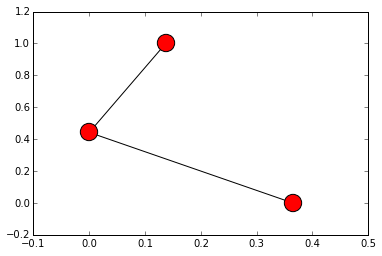

In [5]:
#Generating a test graph of 3 sample sequences
G = nx.Graph()
j = 1
seq1 = 'ACCG'
seq2 = 'ACYG'
seq3 = 'ACCQ'
testdict = {seq1, seq2, seq3}
for seq in testdict: 
    G.add_node(seq)
for seq1, seq2 in combinations(testdict,2):
    if distance.levenshtein(seq1, seq2) == 1:
        G.add_edge(seq1, seq2)
G.edges()
G.nodes()
G.add_node(seq1)
nx.draw_networkx(G, with_labels=False)

In [ ]:
#In-depth test that compares 2 specific sequences
string1 = str(dict[1])
string2 = str(dict[2])
for j, letter in enumerate(string1):
    if string1[j] != string2[j]:
        print(j, letter, string2[j])

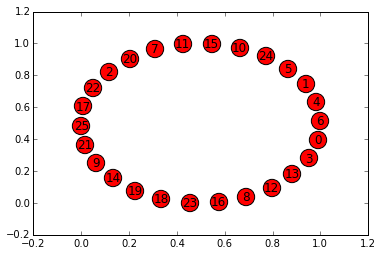

In [44]:
#Sample set of 26 sequences of HA (IAV) from 2013-15
P = nx.Graph()
i=0
dictseq = {}
for seq_record in SeqIO.parse("test\H3N8 HA 2013-2015.fasta","fasta"): #For each sequence, it adds it to a dictionary dict
    #print(seq_record.id)
    dictseq[i] = seq_record.seq
    #print("length = " + str(len(seq_record)))
    #print
    i+=1
for seq in dictseq: 
    P.add_node(seq)
    
for seq1, seq2 in combinations(dictseq, 2):
    if distance.levenshtein(dictseq[seq1], dictseq[seq2]) == 1:
        P.add_edge(seq1, seq2)
    #print(dictseq[seq1], dictseq[seq2])

P.edges()
P.nodes()
#nx.draw_networkx(P, with_labels=True)

In [53]:
import pickle as pkl
import math
m_CPUs = 6
i = 0
print i
master_list = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]
block_size = int(math.ceil(len(master_list)/m_CPUs)) 
print block_size
current_CPU = 0
while(i + block_size) <= len(master_list):
    print i
    with open("pickled_lists\CPU{0}_comparisons.pkllist".format(current_CPU), 'w') as f:
        pkl.dump(master_list[i:i + (block_size)], f)
        i += (block_size)
        current_CPU += 1

0
1
0
1
2
3
4
5


In [54]:
import pickle as pkl
import math

current_CPU = 1
with open("pickled_lists/CPU{0}_comparisons.pkllist".format(current_CPU),'r') as f:
    print pkl.load(f)
    
    
    

[(1, 3)]
